Carregando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

Importando dados.<br>
link dos dados: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv

In [2]:
dados = pd.read_csv('houses.csv',sep = ',')
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


   Como podemos identificar, esse dataset contém dados de casas para alugar. <br>
   Antes de começar a responder as perguntas que queremos, devemos primeiro fazer um tratamento dos dados.
   <br>

Vamos dar uma olhada no tamanho do nosso dataset

In [3]:
dados.shape

(10692, 13)

Temos 10.692 linhas e 13 colunas.

Agora renomear as colunas e alguns termos que estao em ingles, deixando em portugues para um melhor entendimento.

In [4]:
dados.columns = ['cidade', 'area', 'quartos', 'banheiros', 'vagas', 'andar', 'animais', 'mobilhada', 'valor_condominio', 'valor_aluguel', 'iptu', 'seguro_incendio', 'valor_total']

dados['animais'] = dados['animais'].map({'acept':'aceita', 'not acept':'nao_aceita'})

dados['mobilhada'] = dados['mobilhada'].map({'furnished':'sim', 'not furnished':'nao'})

dados.head()


,cidade,area,quartos,banheiros,vagas,andar,animais,mobilhada,valor_condominio,valor_aluguel,iptu,seguro_incendio,valor_total
0,São Paulo,70,2,1,1,7,aceita,sim,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,aceita,nao,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,aceita,nao,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,aceita,nao,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,nao_aceita,nao,0,800,25,11,836


Depois de uma breve analise, concluimos que as colunas estão identificadas da seguinte forma:<br>
<br>
cidade = Cidade onde o imóvel está localizada<br>
area = Area do imovel<br>
quartos = Numero de quartos<br>
banheiros = Numero de banheiros<br>
vagas = Numero de vagas para estacionar<br>
andar = Em qual andar esta situado<br>
animais = Aceita animais?<br>
mobilhada = Mobilhada?<br>
valor_condominio	 = Valor do condomínio em reais<br>
valor_aluguel = valor do Aluguel em reais<br>
iptu = valor do IPTU em reais<br>
seguro_incendio = valor do Seguro Incendio em reais<br>
valor_total = soma dos valores das 4 colunas anteriores<br>
<br>

Primeiro verificar se existe valores faltantes ou duplicados

In [5]:
dados.isnull().sum()

cidade              0
area                0
quartos             0
banheiros           0
vagas               0
andar               0
animais             0
mobilhada           0
valor_condominio    0
valor_aluguel       0
iptu                0
seguro_incendio     0
valor_total         0
dtype: int64

In [6]:
dados[dados.duplicated(keep=False)]

,cidade,area,quartos,banheiros,vagas,andar,animais,mobilhada,valor_condominio,valor_aluguel,iptu,seguro_incendio,valor_total
29,São Paulo,20,1,1,0,5,aceita,sim,602,1800,130,23,2555
76,Porto Alegre,47,1,1,1,1,nao_aceita,sim,400,2200,0,33,2633
122,Belo Horizonte,100,3,2,2,2,aceita,nao,340,1600,183,22,2145
149,São Paulo,60,2,1,0,-,aceita,nao,0,1080,94,17,1191
163,São Paulo,22,1,1,0,-,nao_aceita,nao,0,976,0,15,991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,Porto Alegre,40,1,1,1,9,nao_aceita,sim,1300,1200,68,18,2586
10569,Belo Horizonte,20,1,1,1,-,aceita,sim,0,1100,0,15,1115
10623,Porto Alegre,47,1,1,1,1,nao_aceita,sim,400,2200,0,33,2633
10640,São Paulo,27,1,1,0,5,nao_aceita,nao,1405,3500,1,45,4951


parece nao existir valores nulos(caso existisse dados faltantes, o ideal seria, para dados categoricos utilizar a moda para preenche-los e dados quantitativos utilizar a mediana), mas tem varios valores duplicados, nesse caso ate pode ser valido pois podem existir casas iguais. Agora vamos analisar as colunas.<br>

Vamos dar uma olhada na coluna cidade

In [7]:
dados['cidade'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: cidade, dtype: int64

a coluna cidade parece esta ok. Vamos ver as outras...

In [8]:
dados['area'].describe()

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

In [9]:
print(dados['quartos'].unique())

[ 2  4  1  3  7  5  8  6 10 13  9]


In [10]:
print(dados['banheiros'].unique())

[ 1  4  3  2  6  5  7  9  8 10]


In [11]:
print(dados['vagas'].unique())

[ 1  0  7  4  2  6  3  8  5 10 12]


In [12]:
print(dados['andar'].unique())
print(dados['andar'].unique().size)#quantidade de valores unicos que existe
print(dados['andar'].value_counts(normalize=True))

['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
35
-      0.230172
1      0.101104
2      0.092125
3      0.087074
4      0.069959
5      0.056117
6      0.050412
7      0.046483
8      0.045829
9      0.034512
10     0.033389
11     0.028339
12     0.024037
13     0.018706
14     0.015900
15     0.013749
16     0.010195
17     0.008979
18     0.007015
19     0.004957
20     0.004115
21     0.003928
25     0.002338
23     0.002338
22     0.002245
26     0.001871
24     0.001777
27     0.000748
28     0.000561
29     0.000468
32     0.000187
51     0.000094
301    0.000094
35     0.000094
46     0.000094
Name: andar, dtype: float64


Tem algo de estranho nessa coluna, um valor que é um hifen que ocupa 23% do dados. Há algumas hipoteses do que pode ser esse valor diferente, de acordo com o criador do dataset : "geralmente representam locais que não estão em um andar especifico, como casas.".<br>
Então vamos preencher esse hifen com o valor "casa".

In [13]:
dados.loc[dados['andar'] == '-', 'andar']  = 'casa'
dados['andar'].unique()

array(['7', '20', '6', '2', '1', 'casa', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

Vamos continuar olhando as outras colunas

In [14]:
print(dados['animais'].unique())

['aceita' 'nao_aceita']


In [15]:
print(dados['mobilhada'].unique())

['sim' 'nao']


Vamos verificar os outliers das colunas seguintes, outliers seriam valores fora de um padrao definido, vamos considerar fora padrão valores maiores que 2 desvios padrão.

In [16]:
dados['valor_condominio'].describe()

count    1.069200e+04
mean     1.174022e+03
std      1.559231e+04
min      0.000000e+00
25%      1.700000e+02
50%      5.600000e+02
75%      1.237500e+03
max      1.117000e+06
Name: valor_condominio, dtype: float64

In [17]:
#calculamos o desvio padrao
desvio = dados['valor_condominio'].std()

In [18]:
#quantidade de linhas e colunas
dados.loc[dados['valor_condominio'] >=  2 * desvio].shape

(6, 13)

In [19]:
dados.drop(dados.loc[dados['valor_condominio'] >=  2 * desvio].index, inplace = True)

Existem muitas formas de tratar valores fora do padrao, no caso dessa coluna como são poucas linhas eu removi elas.

In [20]:
dados['valor_aluguel'].describe()

count    10686.000000
mean      3894.431499
std       3404.859373
min        450.000000
25%       1530.000000
50%       2655.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

In [21]:
desvio = dados['valor_aluguel'].std()

In [22]:
dados.loc[dados['valor_aluguel'] >=  2 * desvio].shape

(1744, 13)

In [23]:
mediana = dados['valor_aluguel'].median()

In [24]:
dados.loc[dados['valor_aluguel'] >=  2 * desvio, 'valor_aluguel'] = mediana

Nesse caso tem varios valores fora do padrao, entao atribui a esses valores a mediana da coluna

In [25]:
dados['iptu'].describe()

count     10686.000000
mean        365.702882
std        3107.293434
min           0.000000
25%          38.000000
50%         125.000000
75%         375.000000
max      313700.000000
Name: iptu, dtype: float64

In [26]:
desvio = dados['iptu'].std()

In [27]:
dados.loc[dados['iptu'] >=  2 * desvio].shape

(10, 13)

In [28]:
dados.drop(dados.loc[dados['iptu'] >=  2 * desvio].index, inplace = True)

In [29]:
dados['seguro_incendio'].describe()

count    10676.000000
mean        53.164200
std         47.286498
min          3.000000
25%         21.000000
50%         36.000000
75%         68.000000
max        451.000000
Name: seguro_incendio, dtype: float64

In [30]:
desvio = dados['seguro_incendio'].std()

In [31]:
dados.loc[dados['seguro_incendio'] >=  2 * desvio].shape

(1694, 13)

In [32]:
mediana = dados['seguro_incendio'].median()

In [33]:
dados.loc[dados['seguro_incendio'] >=  2 * desvio, 'seguro_incendio'] = mediana

Como o valor total é a soma do preço das 4 colunas anteriores, temos que atualiza-lo.

In [34]:
#somar tudo de novo
dados['valor_total'] = dados[['valor_condominio', 'valor_aluguel', 'iptu', 'seguro_incendio']].sum(axis=1)

In [35]:
dados['valor_total'].describe()

count    10676.000000
mean      3907.353878
std       2355.677613
min        499.000000
25%       2059.750000
50%       3372.500000
75%       5239.500000
max      21826.000000
Name: valor_total, dtype: float64

Agora vamos para as perguntas:

<h2>Pergunta N.º 1: Quantas cidades estão registradas no conjunto de dados?

In [36]:
print("As cidades registradas no banco de dados são:\n")
for i in dados['cidade'].unique():
    print(i)
else:
    print("\nSão 5 cidades no total")

As cidades registradas no banco de dados são:

São Paulo
Porto Alegre
Rio de Janeiro
Campinas
Belo Horizonte

São 5 cidades no total


<h2>Pergunta N.º 2: Top 5 cidades que aparecem com mais frequencia?

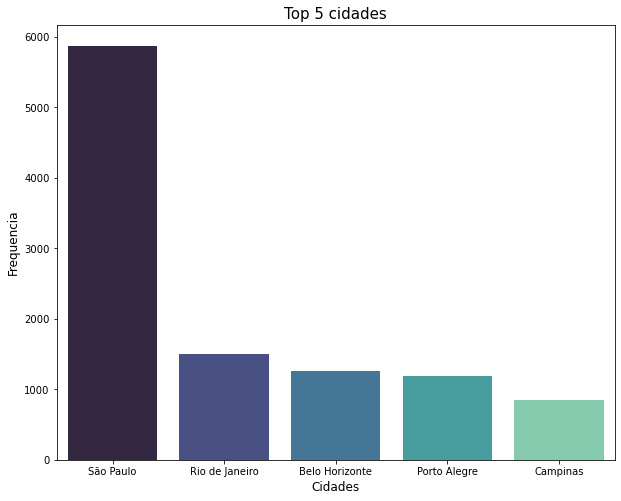

In [37]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'cidade', data=dados, order = dados['cidade'].value_counts().index[:], palette = 'mako')
plt.ylabel("Frequencia", fontsize=12)
plt.xlabel("Cidades", fontsize=12)
plt.title("Top 5 cidades", fontsize=15)
plt.show()

<h2>Pergunta N.º 3: Qual a media, mediana e moda da coluna quartos?

In [38]:
print(f"A media da coluna quartos é {round(dados['quartos'].describe()['mean'],2)}\n")
print(f"A mediana da coluna quartos é {round(dados['quartos'].describe()['50%'])}\n")
print(f"A moda da coluna quartos é {dados['quartos'].mode()[0]}\n")

A media da coluna quartos é 2.51

A mediana da coluna quartos é 2

A moda da coluna quartos é 3



<h2>Pergunta N.º 4: Qual a media, mediana e moda da coluna banheiros?

In [39]:
print(f"A media da coluna banheiros é {round(dados['banheiros'].describe()['mean'],2)}\n")
print(f"A mediana da coluna banheiros é {round(dados['banheiros'].describe()['50%'])}\n")
print(f"A moda da coluna banheiros é {dados['banheiros'].mode()[0]}\n")

A media da coluna banheiros é 2.23

A mediana da coluna banheiros é 2

A moda da coluna banheiros é 1



<h2>Pergunta N.º 5: Qual a media, mediana e moda da coluna total?

In [40]:
print(f"A media da coluna valor total é {round(dados['valor_total'].describe()['mean'],2)}\n")
print(f"A mediana da coluna valor total é {dados['valor_total'].describe()['50%']}\n")
print(f"A moda da coluna valor total é {dados['valor_total'].mode()[0]}\n")

A media da coluna valor total é 3907.35

A mediana da coluna valor total é 3372.5

A moda da coluna valor total é 2691



<h2>Pergunta N.º 6: Como a coluna IPTU esta distribuida?

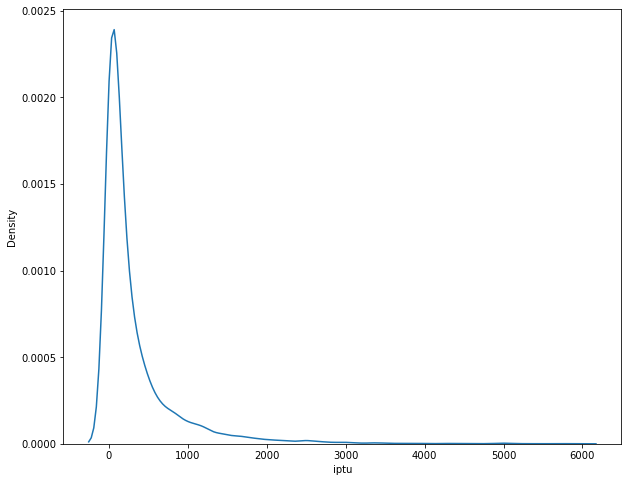

In [41]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=dados, x = 'iptu')
plt.show()

Como podemos ver, esse grafico é bem assimétrico. Tem um pico entre 0 a 500, quer dizer que a maioria dos valores de IPTU dos imoveis estao entre 0 a 500 reais.

<h2>Pergunta N.º 7: Como a coluna Valor_Aluguel esta distribuida?

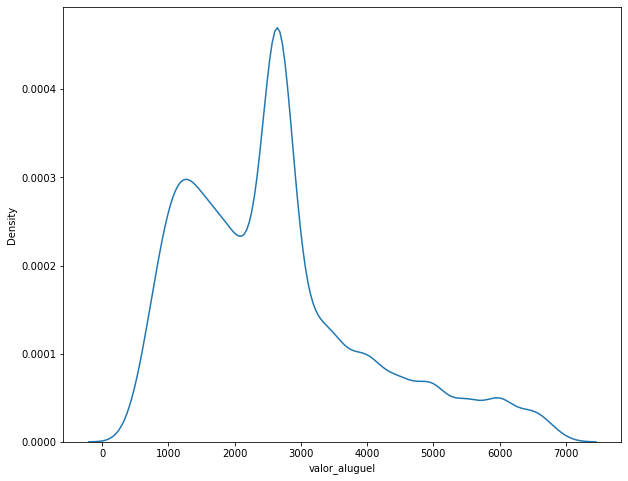

In [42]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=dados, x = 'valor_aluguel')
plt.show()

Ja nesse grafico podemos ver que exitem 2 picos. O maior esta entre 2500 a 3000 reais e o outro varia entre 1000 a 1500 reais.

<h2>Pergunta N.º 8: Como a coluna Valor_condominio esta distribuida?

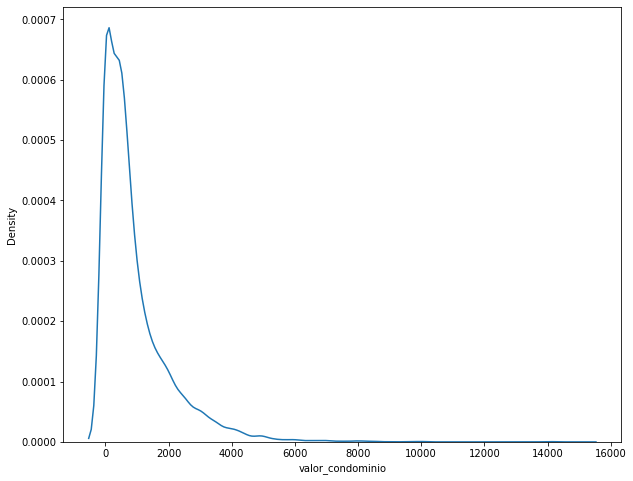

In [43]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=dados, x = 'valor_condominio')
plt.show()

Como no primeiro grafico, esse tambem tem quase o mesmo comportamento. A maioria dos imoveis registrados tem o valor do condominio de entre 0 a 2000 reais.

<h2>Pergunta N.º 9: Como as 5 ultimas colunas se correlacionam?

In [44]:
corr = dados.corr().loc['valor_condominio':'valor_total', 'valor_condominio':'valor_total']

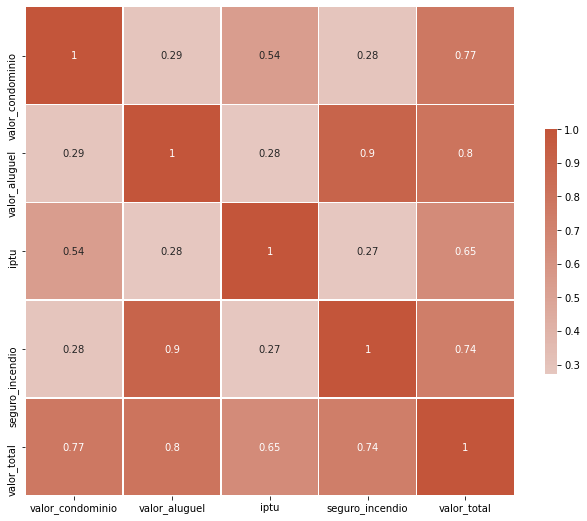

In [45]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Como podemos ver no mapa de calor acima, as colunas ```valor_condominio``` e ```iptu``` tem uma relação muito fraca com ```valor_aluguel``` e ```seguro_incendio```.<br>
Mas olha que interessante, a coluna ```valor_aluguel``` tem uma relação quase perfeita com ```seguro_incendio```, vamos criar um grafico de dispersão para ver se encontramos o motivo.

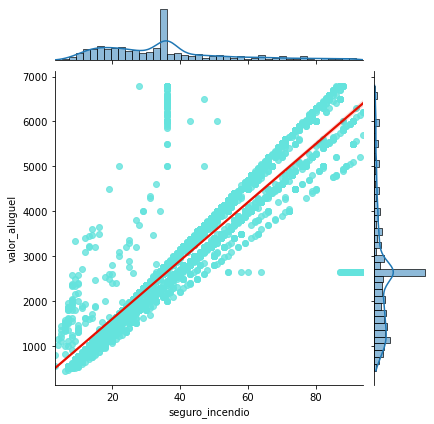

In [46]:
sns.jointplot(data=dados, x = 'seguro_incendio', y = 'valor_aluguel', kind="reg", joint_kws={'color':'#64E3DD', 'line_kws':{'color':'#E60F00'}})
plt.show()

O grafico por si só ja diz o motivo da correlação quase perfeita, como podemos observar, conforme o ```valor_aluguel``` aumenta, o valor de ```seguro_incendio``` tambem aumenta.

<h2>Pergunta N.º 10: Seria possivel prever preços de aluguel usando regressão linear com as informações do conjunto de dados?

Iremos usar regressão linear para prever o valor do aluguel das casas

In [47]:
#importar biblioteca que facilita a separação
from sklearn.model_selection import train_test_split

Primeiro teremos que preparar os dados para que não tenhamos problemas com sintaxe na hora de treinarmos nosso modelo

In [48]:
# Crio uma nova variavel e atribuo os valores do dataset a essa nova variavel
dadosT = dados

# Substituo o nome das cidades por indices
dadosT['cidade'] = dadosT['cidade'].map({'São Paulo':'1', 
                                         'Rio de Janeiro':'2', 
                                         'Belo Horizonte':'3', 
                                         'Porto Alegre':'4', 
                                         'Campinas':'5'})

# substituo o valor casa para zero
dadosT.loc[dadosT['andar'] == 'casa', 'andar']  = '0'

# substituo os valores de da coluna mobilhada para se sim = 1, se nao = 0
dadosT['mobilhada'] = dadosT['mobilhada'].map({'sim':1, 
                                         'nao':0})

# substituo os valores de da coluna animais para se aceita = 1, se nao_aceita = 0
dadosT['animais'] = dadosT['animais'].map({'aceita':1, 
                                         'nao_aceita':0})

#converto todas as colunas para numeros
dadosT = dadosT.apply(pd.to_numeric)

#converto a coluna mobilhada para valor boleano se 1 = True se 0 = False
dadosT['mobilhada'] = dadosT['mobilhada'].astype('bool')

#converto a coluna animais para valor boleano se 1 = True se 0 = False
dadosT['animais'] = dadosT['animais'].astype('bool')

dadosT.head()

,cidade,area,quartos,banheiros,vagas,andar,animais,mobilhada,valor_condominio,valor_aluguel,iptu,seguro_incendio,valor_total
0,1,70,2,1,1,7,True,True,2065,3300,211,42,5618
1,1,320,4,4,0,20,True,False,1200,4960,1750,63,7973
2,4,80,1,1,1,6,True,False,1000,2800,0,41,3841
3,4,51,2,1,0,2,True,False,270,1112,22,17,1421
4,1,25,1,1,0,1,False,False,0,800,25,11,836


Agora devemos separar os dados em treino e teste para saber-mos a eficiencia do modelo.<br>
Vamos separar 20% dos dados para teste e 80% para treino.

In [49]:
x = dadosT.drop(['valor_total','valor_aluguel','valor_condominio','seguro_incendio','iptu'], axis = 1)
y = dadosT['valor_aluguel'] 

#separando dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state=123)

Retirei as colunas ```valor_total```, ```valor_aluguel``` , ```valor_condominio``` , ```seguro_incendio```, ```iptu``` e deixei as outras coluans no ```x``` que é nossa variavel independente. <br>
No ```y``` deixei a coluna ```valor_aluguel``` que é nossa variavel dependente.<br>

Agora vamos treinar nosso modelo com os dados de treino e depois testa-lo com os dados de teste.

In [50]:
#cria o modelo de regressão linear
modelo = LinearRegression()

# Treina o modelo com os dados de treino
modelo.fit(x_treino, y_treino)

# Testa a eficiencia do modelo com os dados de teste
modelo.score(x_teste, y_teste)

0.269510718241634

Como resultado, temos o valor da acurácia: ~0,269. Então, concluímos que o nosso modelo está acertando ~27% das previsões (caso tivéssemos 100 experimentos, o modelo acertaria 27 casos e erraria 73 casos).<br>
È um resultado ruim, vamos adicionar algumas colunas para ver o seu desempenho.

In [51]:
x1 = dadosT.drop(['valor_total','valor_aluguel'], axis = 1)
y1 = dadosT['valor_aluguel']

#separando dados de treino e teste
x1_treino, x1_teste, y1_treino, y1_teste = train_test_split(x1, y1, test_size = 0.2, random_state=123)

Agora adicionei as colunas  ```valor_condominio``` , ```seguro_incendio```, ```iptu``` como variaveis independentes tambem, vamos ver o resultado.

In [52]:
#cria o modelo de regressão linear
modelo2 = LinearRegression()

# Treina o modelo com os dados de treino
modelo2.fit(x1_treino, y1_treino)

# Testa a eficiencia do modelo com os dados de teste
modelo2.score(x1_teste, y1_teste)

0.7846786784544583

 Agora temos o valor da acurácia: ~0,784. Quer dizer que o nosso modelo está acertando ~78% das previsões.<br><br>
 Melhorou bastante o resultado de previsão em relação ao anterior. Concluimos que, para o modelo conseguir uma boa acuracia precisariamos das colunas que foram adicionadas considerando o volume de dados que temos no momento, ou precisariamos de mais dados.<br><br>

                                 3 ads Noturno - Vitor Santos Lopes